# [CDAF] Atividade 2

## Nome e matrícula
Nome: Antônio Caetano Neves Neto
Matrícula: 2022043698

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre estatísticas agregadas. Para esta atividade, usaremos dados do Brasileirão 2023 do FBRef.

## Questão 1
- Acesse os dados em https://fbref.com/en/comps/24/2023/schedule/2023-Serie-A-Scores-and-Fixtures
- Crie uma média móvel de 5 jogos, para cada equipe, de cada uma das seguintes estatísticas: xG pró, xG contra, e diferença de xG.
- Escolha 4 times para visualizar a série temporal das estatísticas acima. Uma visualização para cada uma das estatísticas, onde a média geral do campeonato é apresentada com uma linha pontilhada em conjunto com a média móvel dos times escolhidos.
- Interprete os resultados. O que isso pode indicar sobre a qualidade ofensiva e defensiva dos times escolhidos?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv", sep=";")

df["xG"] = df["xG"].astype(float)
df["xG.1"] = df["xG.1"].astype(float)

df.head(n=3)

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1,Sat,"sábado, 15 de abril de 2023",16:00,América (MG),1.1,0–3,3.1,Fluminense,"6,653",Estádio Raimundo Sampaio,Braulio da Silva Machado,Match Report,NaN
1,1,Sat,"sábado, 15 de abril de 2023",16:00,Palmeiras,3.0,2–1,1.0,Cuiabá,"35,835",Allianz Parque,Paulo Cesar Zanovelli da Silva,Match Report,NaN
2,1,Sat,"sábado, 15 de abril de 2023",18:30,Bragantino,2.0,2–1,0.7,Bahia,"3,368",Estádio Nabi Abi Chedid,Maguielson Lima Barbosa,Match Report,NaN


In [3]:
# Preparando os dados adquiridos, separando por time e tratando a questão de jogo fora e dentro de casa.
teams = df["Home"].unique()

data_each_team = {team: df.query(f"Home == '{team}' | Away == '{team}'") for team in teams}

stats_each_team = {team: pd.DataFrame(
        {"xG Pró": [row["xG"] if row["Home"] == team else row["xG.1"] for idx, row in df.iterrows()],
         "xG Contra": [row["xG.1"] if row["Home"] == team else row["xG"] for idx, row in df.iterrows()]
        })
    for team, df in data_each_team.items()}

In [4]:
# Adquirindo a média móvel por time
janela = 5

moving_average_each_team = {
    team: pd.DataFrame({
        "xG_pro_ma": stats["xG Pró"].rolling(window=janela).mean().dropna(),
        "xG_contra_ma": stats["xG Contra"].rolling(window=janela).mean().dropna()
    })
    for team, stats in stats_each_team.items()
}

In [5]:
mean_stats = sum(moving_average_each_team.values()) / len(moving_average_each_team.keys())

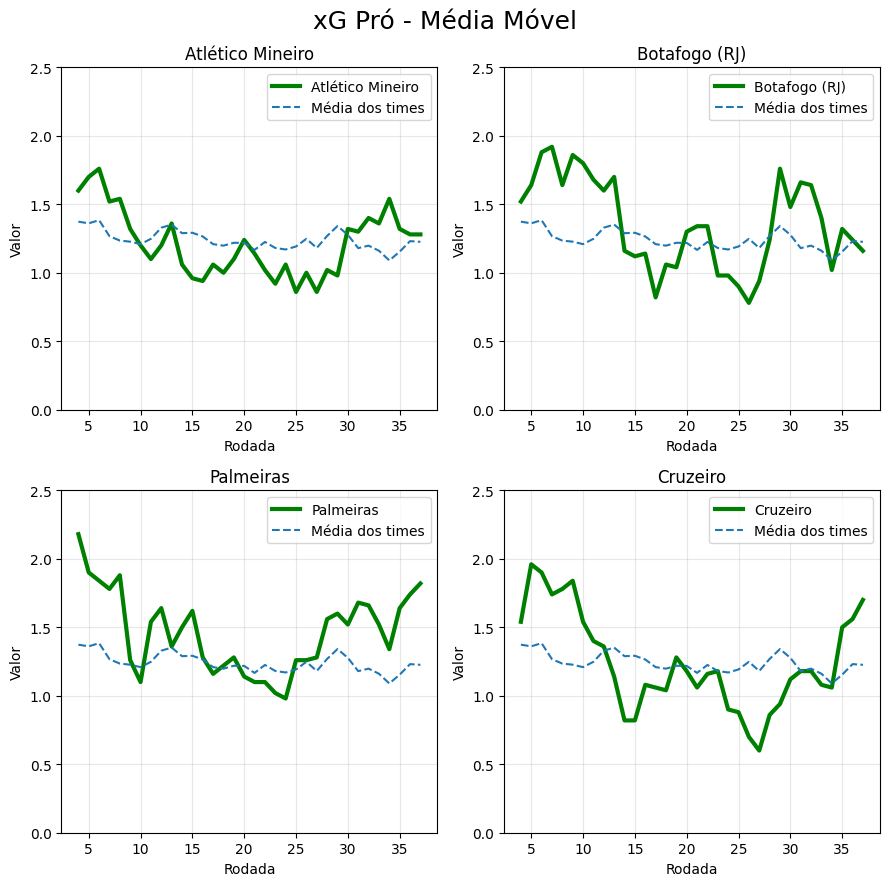

In [6]:
# Plotando as médias móveis
selected_teams = ["Atlético Mineiro", "Botafogo (RJ)", "Palmeiras", "Cruzeiro"]

figure, axis = plt.subplots(2, 2, figsize=(9, 9))

for idx, team in enumerate(selected_teams):
    ax = axis[idx // 2, idx%2]

    stats = moving_average_each_team[team]
    
    ax.plot(stats["xG_pro_ma"], label=team, linewidth=3, color="green")
    ax.plot(mean_stats["xG_pro_ma"], label="Média dos times", linestyle='dashed')
    
    ax.set_ylabel("Valor")
    ax.set_xlabel("Rodada")
    ax.set_title(team)
    ax.grid(alpha=0.3)
    
    ax.legend()
    ax.set_ylim(0, 2.5)

plt.suptitle("xG Pró - Média Móvel", fontsize=18)
plt.tight_layout()
plt.show()

**Com três times de ponta de tabela e um de baixo, conseguimos perceber a diferença de desempenho durante as rodadas dado o xG abaixo ou superior da média. O Atlético Mineiro teve um meio de tabela fraco, com uma sequência alta de jogos sem ganhar, fato que fez o time ficar abaixo da média. O Botafogo a mesma coisa, entretanto, como foi um time muito perigoso durante todo o campeonato, o seu xG foi bem valorizado. A arrancada final do Palmeiras é bem perceptível, sendo um time com xG bem acima da média. Para o Cruzeiro, é claro que a maior parte do campeonato ficou na parte de baixo da tabela, refletindo no seu xG Pró.**

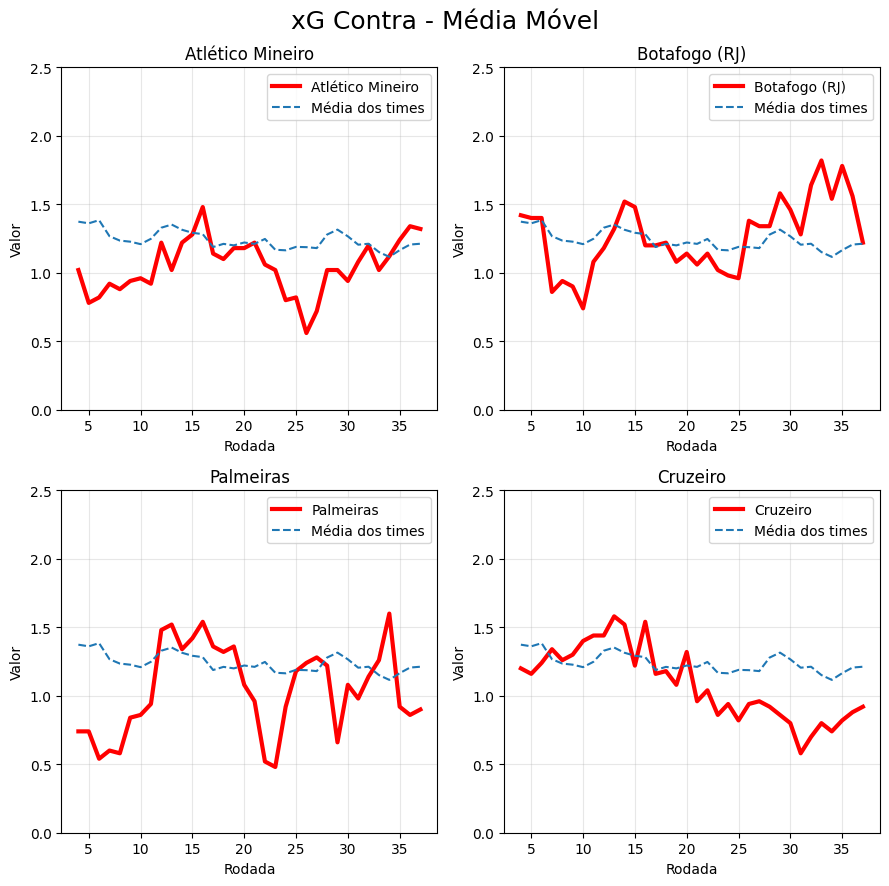

In [7]:
# Plotando as médias móveis
figure, axis = plt.subplots(2, 2, figsize=(9, 9))

for idx, team in enumerate(selected_teams):
    ax = axis[idx // 2, idx%2]

    stats = moving_average_each_team[team]
    
    ax.plot(stats["xG_contra_ma"], label=team, linewidth=3, color="red")
    ax.plot(mean_stats["xG_contra_ma"], label="Média dos times", linestyle='--')
        
    ax.set_ylabel("Valor")
    ax.set_xlabel("Rodada")
    ax.set_title(team)
    ax.grid(alpha=0.3)
    
    ax.legend()
    ax.set_ylim(0, 2.5)

plt.suptitle("xG Contra - Média Móvel", fontsize=18)
plt.tight_layout()
plt.show()

**Atlético Mineiro, chegando a ser uma das melhores defesas do Brasileirão 2023, junto com a do Cruzeiro, é perceptível que reflete no xG Contra, tornando abaixo da média constantemente, destaque para as rodadas finais do Cruzeiro. Ao contrário, o Botafogo cresceu muito seu xG contra, fato que possa ser explicado da sua decadência de produtividade dos jogos nas rodadas finais.**

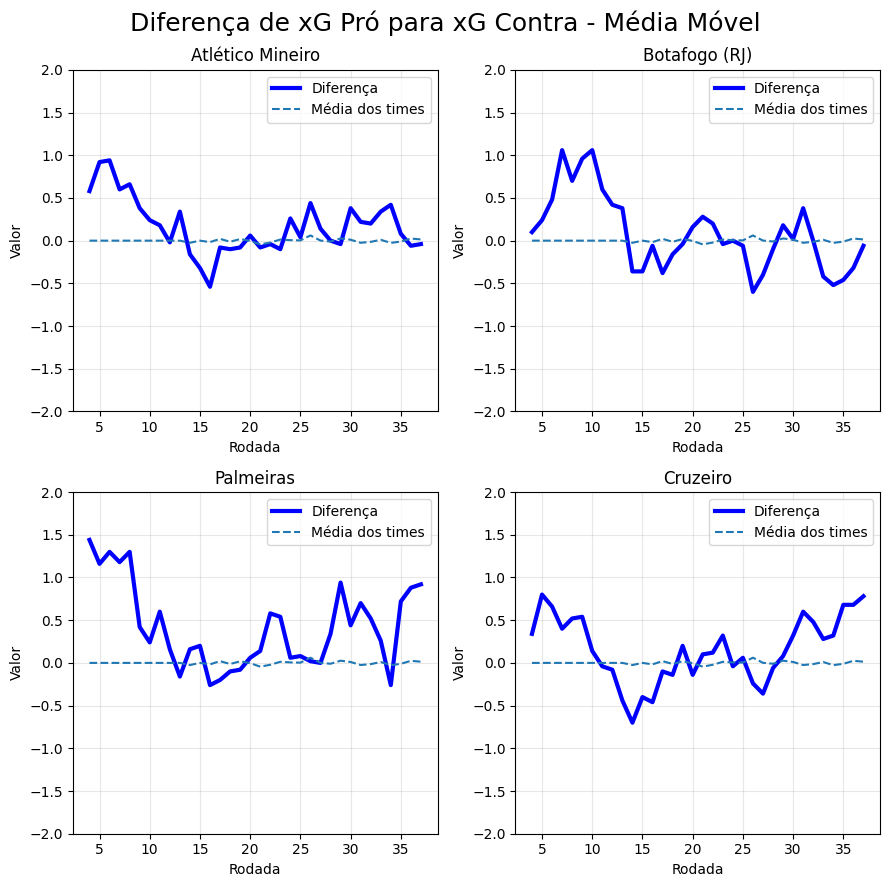

In [8]:
# Plotando as médias móveis
figure, axis = plt.subplots(2, 2, figsize=(9, 9))

for idx, team in enumerate(selected_teams):
    ax = axis[idx // 2, idx%2]

    stats = moving_average_each_team[team]
    
    ax.plot(stats["xG_pro_ma"] - stats["xG_contra_ma"], label="Diferença", color="blue", linewidth=3)
    ax.plot(mean_stats["xG_pro_ma"] - mean_stats["xG_contra_ma"], label="Média dos times", linestyle='--')
        
    ax.set_ylabel("Valor")
    ax.set_xlabel("Rodada")
    ax.set_title(team)
    ax.grid(alpha=0.3)
    
    ax.legend()
    ax.set_ylim(-2, 2)

plt.suptitle("Diferença de xG Pró para xG Contra - Média Móvel", fontsize=18)
plt.tight_layout()
plt.show()

**Uma das linhas mais instáveis, mas com superiodade vísivel do Palmeiras, chegando a ter quase 1.5 de diferença de xG em certas partidas. Nesses gráficos, é refletido os confrontos com times fortes que os times tem, onde a diferença se torna negativa ou quase igual a 0. Da mesma forma que os outros, as rodadas finais teve tendências opostas para Cruzeiro e Botafogo.**

## Questão 2
- Agora repita a questão 1, plotando as séries temporais dos mesmos times, mas para uma janela móvel de 10 jogos.
- Quais as diferenças entre as séries temporais de 5 e 10 jogos? Em quais situações pode ser vantajoso escolher uma janela ao invés da outra?

In [9]:
# Adquirindo a média móvel por time
janela = 10

moving_average_each_team = {
    team: pd.DataFrame({
        "xG_pro_ma": stats["xG Pró"].rolling(window=janela).mean().dropna(),
        "xG_contra_ma": stats["xG Contra"].rolling(window=janela).mean().dropna()
    })
    for team, stats in stats_each_team.items()
}

In [10]:
mean_stats = sum(moving_average_each_team.values()) / len(moving_average_each_team.keys())

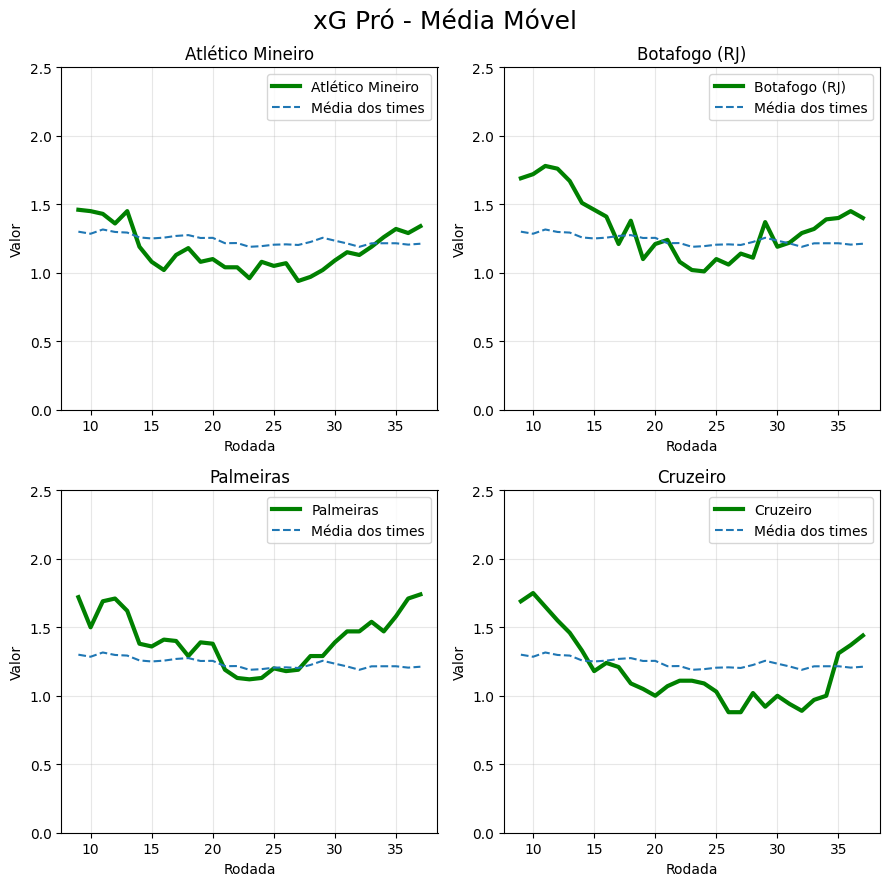

In [11]:
# Plotando as médias móveis
selected_teams = ["Atlético Mineiro", "Botafogo (RJ)", "Palmeiras", "Cruzeiro"]

figure, axis = plt.subplots(2, 2, figsize=(9, 9))

for idx, team in enumerate(selected_teams):
    ax = axis[idx // 2, idx%2]

    stats = moving_average_each_team[team]
    
    ax.plot(stats["xG_pro_ma"], label=team, linewidth=3, color="green")
    ax.plot(mean_stats["xG_pro_ma"], label="Média dos times", linestyle='dashed')
    
    ax.set_ylabel("Valor")
    ax.set_xlabel("Rodada")
    ax.set_title(team)
    ax.grid(alpha=0.3)
    
    ax.legend()
    ax.set_ylim(0, 2.5)

plt.suptitle("xG Pró - Média Móvel", fontsize=18)
plt.tight_layout()
plt.show()

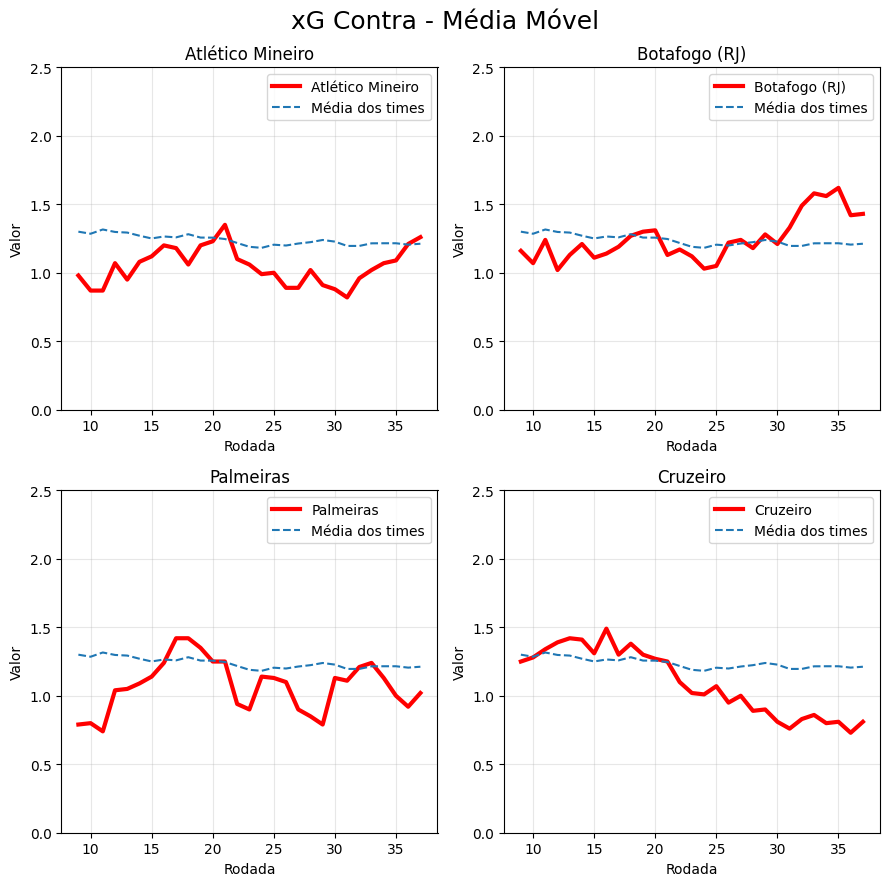

In [12]:
# Plotando as médias móveis
figure, axis = plt.subplots(2, 2, figsize=(9, 9))

for idx, team in enumerate(selected_teams):
    ax = axis[idx // 2, idx%2]

    stats = moving_average_each_team[team]
    
    ax.plot(stats["xG_contra_ma"], label=team, linewidth=3, color="red")
    ax.plot(mean_stats["xG_contra_ma"], label="Média dos times", linestyle='--')
        
    ax.set_ylabel("Valor")
    ax.set_xlabel("Rodada")
    ax.set_title(team)
    ax.grid(alpha=0.3)
    
    ax.legend()
    ax.set_ylim(0, 2.5)

plt.suptitle("xG Contra - Média Móvel", fontsize=18)
plt.tight_layout()
plt.show()

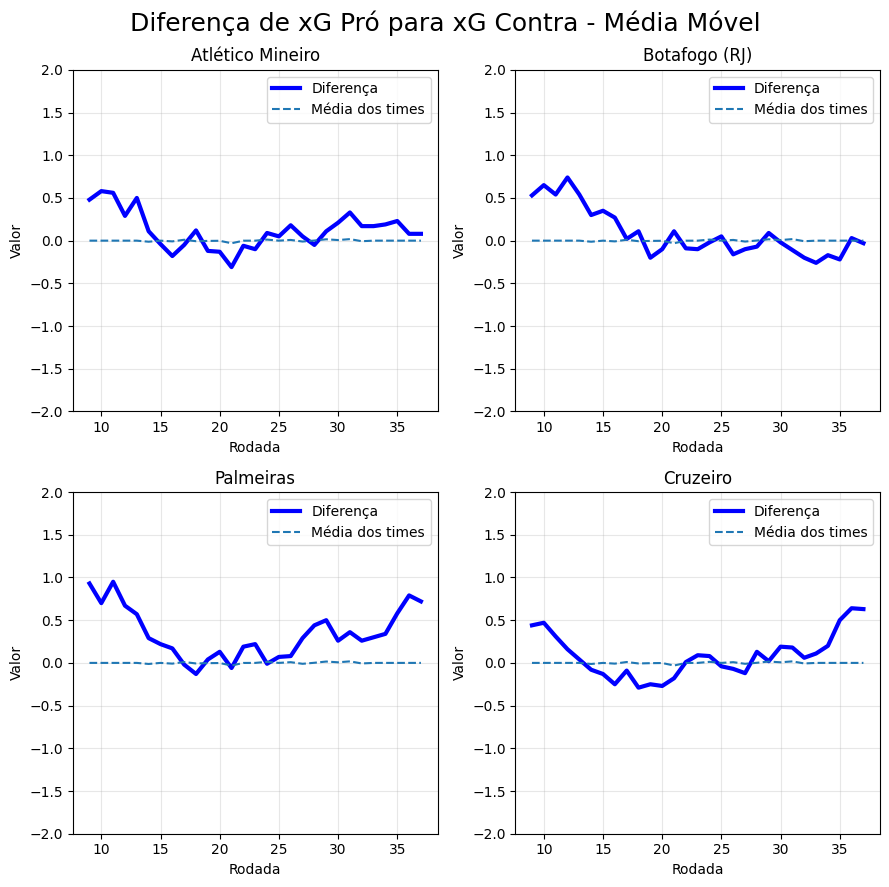

In [13]:
# Plotando as médias móveis
figure, axis = plt.subplots(2, 2, figsize=(9, 9))

for idx, team in enumerate(selected_teams):
    ax = axis[idx // 2, idx%2]

    stats = moving_average_each_team[team]
    
    ax.plot(stats["xG_pro_ma"] - stats["xG_contra_ma"], label="Diferença", color="blue", linewidth=3)
    ax.plot(mean_stats["xG_pro_ma"] - mean_stats["xG_contra_ma"], label="Média dos times", linestyle='--')
        
    ax.set_ylabel("Valor")
    ax.set_xlabel("Rodada")
    ax.set_title(team)
    ax.grid(alpha=0.3)
    
    ax.legend()
    ax.set_ylim(-2, 2)

plt.suptitle("Diferença de xG Pró para xG Contra - Média Móvel", fontsize=18)
plt.tight_layout()
plt.show()

**Com uma janela móvel de 10 jogos, é possível verificar tendências de longo prazo dos dados, devido a maior suavização e menor impacto de outliers, onde com uma janela móvel de 5 jogos não acontece, pois é mais variante a ruído, mas a resposta de mudança de tendência é mais rápida. Logo, nota-se o trade-off entre eliminação de ruídos e resposta rápida a mudanças.**

**Assim, janelas móveis maiores são a escolha quando queremos observar tendências de longo prazo, e janelas móveis menores para tendências de curto prazo.**

## Questão 3
- Vá para o link
-- https://fbref.com/en/comps/24/2023/stats/2023-Serie-A-Stats
- Nesta seção de estatísticas, é possível navegar por estatísticas específicas para diferentes aspectos do jogo (finalização, passe, defesa, etc.). Para todos exercícios a partir deste, você terá que selecionar aquelas que julgar mais relevantes para responder as questões.
- Monte um radar plot com 6 atributos relevantes para atacantes e compare 3 jogadores de sua escolha. Justifique a escolha de cada um dos atributos, a escolha da escala dos radares e o tipo de normalização. Interprete os resultados dos radares em termos das qualidades e limitações dos jogadores.
- Ref Soccermatics:
-- https://soccermatics.readthedocs.io/en/latest/lesson3/ScoutingPlayers.html
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson3/plot_RadarPlot.html

In [14]:
players_goals = pd.read_csv("Goals_and_Shoot.csv", sep=";")
players_goals.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,...,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.1,Fld.1,Def.1,Matches
0,1,Nicolás Acevedo,uy URU,MF,Bahia,23.0,1999.0,21.9,43.0,1.96,...,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Matches
1,2,Luiz Adriano,br BRA,FW,Internacional,35.0,1987.0,14.8,23.0,1.56,...,0.0,2.0,0.14,1.0,0.0,0.0,1.0,0.0,0.0,Matches
2,3,Adriel,br BRA,GK,Grêmio,22.0,2001.0,2.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Matches
3,4,Adryelson,br BRA,DF,Botafogo (RJ),24.0,1998.0,33.3,13.0,0.39,...,1.0,2.0,0.06,1.0,0.0,0.0,0.0,0.0,1.0,Matches
4,5,Adson,br BRA,"FW,MF",Corinthians,22.0,2000.0,9.5,33.0,3.47,...,1.0,3.0,0.32,2.0,0.0,1.0,0.0,0.0,0.0,Matches


In [15]:
teams_possesion = pd.read_csv("Team_Possession.csv", sep=";")
teams_possesion = teams_possesion.set_index("Squad")
teams_possesion.head()

,# Pl,Poss,90s,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,...,Carries,TotDist,PrgDist,PrgC,01/mar,CPA,Mis,Dis,Rec,PrgR
Squad,,,,,,,,,,,,,,,,,,,,,
América (MG),46,43.1,38.0,19682,2157,6161,8822,4981,765,19676,...,10711,63454,33045,638,475,130,571,305,11379,1368
Ath Paranaense,40,48.5,38.0,21066,2178,6473,9962,4847,765,21062,...,11370,58981,29349,592,447,124,535,313,13032,1350
Atlético Mineiro,31,52.8,38.0,23490,2361,6975,11492,5274,638,23484,...,13532,72571,38672,657,549,143,575,364,15369,1394
Bahia,35,49.7,38.0,21852,2131,6532,10220,5345,750,21848,...,12223,66910,35723,687,533,121,578,302,13731,1491
Botafogo (RJ),36,48.1,38.0,21767,2061,6289,10667,5044,710,21760,...,12233,68659,34516,658,488,147,565,314,13797,1424


In [16]:
players_shooting = pd.read_csv("Shooting_Players.csv", sep=";")
players_shooting.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Nicolás Acevedo,uy URU,MF,Bahia,23.0,1999.0,21.9,0,23,...,25.3,0.0,0,0,0.9,0.9,0.04,-0.9,-0.9,Matches
1,2,Luiz Adriano,br BRA,FW,Internacional,35.0,1987.0,14.8,3,24,...,14.4,0.0,0,0,2.6,2.6,0.11,0.4,0.4,Matches
2,3,Adriel,br BRA,GK,Grêmio,22.0,2001.0,2.0,0,0,...,NaN,0.0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
3,4,Adryelson,br BRA,DF,Botafogo (RJ),24.0,1998.0,33.3,1,12,...,9.9,0.0,0,0,1.1,1.1,0.09,-0.1,-0.1,Matches
4,5,Adson,br BRA,"FW,MF",Corinthians,22.0,2000.0,9.5,0,10,...,24.1,0.0,0,0,0.4,0.4,0.04,-0.4,-0.4,Matches


In [17]:
player_possession = pd.read_csv("Player_Possession.csv", sep=";")
player_possession.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Touches,Def Pen,...,TotDist,PrgDist,PrgC,01/mar,CPA,Mis,Dis,Rec,PrgR,Matches
0,1,Nicolás Acevedo,uy URU,MF,Bahia,23.0,1999.0,21.9,1476.0,37.0,...,4197.0,2223.0,29.0,23.0,5.0,25.0,18.0,997.0,36.0,Matches
1,2,Luiz Adriano,br BRA,FW,Internacional,35.0,1987.0,14.8,360.0,20.0,...,528.0,126.0,3.0,3.0,1.0,18.0,17.0,250.0,49.0,Matches
2,3,Adriel,br BRA,GK,Grêmio,22.0,2001.0,2.0,65.0,54.0,...,141.0,109.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,Matches
3,4,Adryelson,br BRA,DF,Botafogo (RJ),24.0,1998.0,33.3,1895.0,292.0,...,4174.0,2293.0,2.0,3.0,1.0,3.0,1.0,1140.0,3.0,Matches
4,5,Adson,br BRA,"FW,MF",Corinthians,22.0,2000.0,9.5,497.0,7.0,...,2594.0,1468.0,49.0,33.0,7.0,17.0,5.0,357.0,68.0,Matches


In [18]:
# Número de jogos jogados por jogador
games_per_player = players_goals["90s"]

In [19]:
# Posse de bola do time do jogador
possession_per_player = pd.Series([teams_possesion.loc[team, "Poss"] for team in players_goals["Squad"]])

In [20]:
# Calculando a taxa de acerto de pênaltis
# Para Evitar divisão por zero
players_shooting.loc[players_shooting["PKatt"] == 0, "PKatt"] = 1

penalti_rate = (players_shooting["PK"] / players_shooting["PKatt"])

In [21]:
# Chutes no gol, normalizado por 'games_per_player'
shoots_on_target = players_shooting["SoT%"] / games_per_player

In [22]:
# Taxa de gols sobre chutes no gol, normalizado por 'games_per_player'
goals_per_shoot_on_target = players_shooting["G/SoT"] / games_per_player

In [23]:
# Chance de gols criadas
shoots_created = players_goals["SCA90"]

In [24]:
# Quantidade de dribles efetivos que ocasionaram em uma chance de gol, normalizado por 'games_per_player'
take_ons = (players_goals["TO"] * player_possession["Succ%"]) / games_per_player

In [25]:
# Quantidade de ações defensivas que resultaram em gol, normalizado por 'games_per_player'
defensive_create_goals = players_goals["Def.1"] / games_per_player

In [26]:
offensive_stats = pd.concat([penalti_rate, shoots_on_target, goals_per_shoot_on_target, shoots_created, take_ons, defensive_create_goals], axis=1)
offensive_stats.columns = ["penalti_rate", "shoots_on_target", "goals_per_shoot_on_target", "shoots_created", "take_ons", "defensive_create_goals"]
offensive_stats.fillna(0, inplace=True)

for col in offensive_stats.columns:
    offensive_stats[col] /= (possession_per_player/100)

In [27]:
from scipy import stats

# Selecionando os jogadores
hulk = offensive_stats.loc[players_shooting.query("Player == 'Hulk' & Squad == 'Atlético Mineiro'")["Rk"].values[0]-1, :]
endrick = offensive_stats.loc[players_shooting.query("Player == 'Endrick' & Squad == 'Palmeiras'")["Rk"].values[0]-1, :]
suarez = offensive_stats.loc[players_shooting.query("Player == 'Luis Suárez' & Squad == 'Grêmio'")["Rk"].values[0]-1, :]

values_hulk = [round(hulk[column], 2) for column in offensive_stats.columns]
values_endrick = [round(endrick[column], 2) for column in offensive_stats.columns]
values_suarez = [round(suarez[column], 2) for column in offensive_stats.columns]

percentiles_hulk = [int(stats.percentileofscore(offensive_stats[col], hulk[col])) for col in offensive_stats.columns]
percentiles_endrick = [int(stats.percentileofscore(offensive_stats[col], endrick[col])) for col in offensive_stats.columns]
percentiles_suarez = [int(stats.percentileofscore(offensive_stats[col], suarez[col])) for col in offensive_stats.columns]

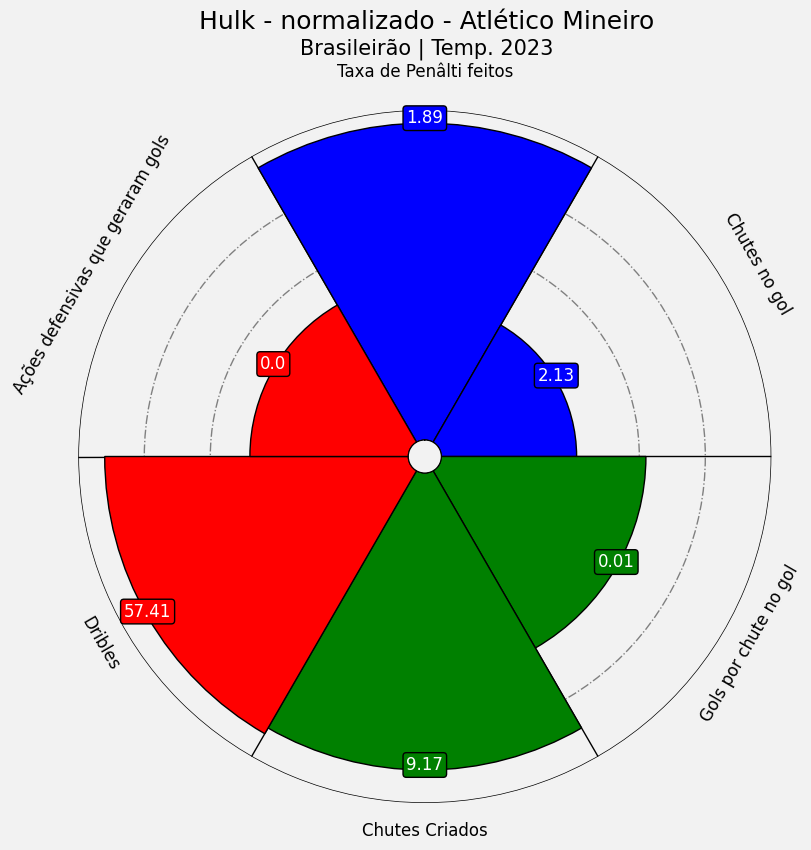

In [28]:
from mplsoccer import PyPizza, FontManager

names = ["Taxa de Penâlti feitos", "Chutes no gol", "Gols por chute no gol", "Chutes Criados", "Dribles", "Ações defensivas que geraram gols"]
slice_colors = ["blue"] * 2 + ["green"] * 2 + ["red"] * 2
text_colors = ["white"]*6

baker = PyPizza(
    params=names,
    min_range = None, 
    max_range = None,              
    straight_line_color="#000000",  
    straight_line_lw=1,             
    last_circle_lw=1,               
    other_circle_lw=1,              
    other_circle_ls="-."            
)

fig, ax = baker.make_pizza(
    percentiles_hulk,             
    figsize=(9, 9),      
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors,
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   
    kwargs_params=dict(
        color="#000000", fontsize=12,
    ),                   
    kwargs_values=dict(
        color="#000000", fontsize=12,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    
)

texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(values_hulk[i]))

fig.text(
    0.515, 0.97, "Hulk - normalizado - Atlético Mineiro", size=18,
    ha="center", color="#000000"
)

fig.text(
    0.515, 0.942,
    "Brasileirão | Temp. 2023",
    size=15,
    ha="center", color="#000000"
)
plt.show()

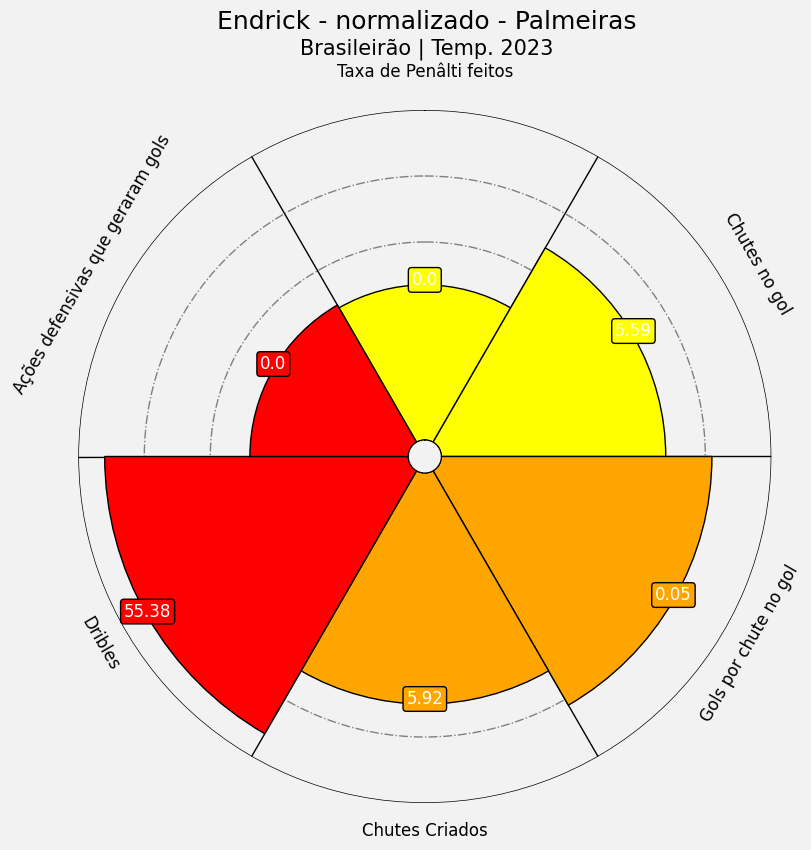

In [29]:
from mplsoccer import PyPizza, FontManager

names = ["Taxa de Penâlti feitos", "Chutes no gol", "Gols por chute no gol", "Chutes Criados", "Dribles", "Ações defensivas que geraram gols"]
slice_colors = ["yellow"] * 2 + ["orange"] * 2 + ["red"] * 2
text_colors = ["white"]*6

baker = PyPizza(
    params=names,
    min_range = None, 
    max_range = None,              
    straight_line_color="#000000",  
    straight_line_lw=1,             
    last_circle_lw=1,               
    other_circle_lw=1,              
    other_circle_ls="-."            
)

fig, ax = baker.make_pizza(
    percentiles_endrick,             
    figsize=(9, 9),      
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors,
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   
    kwargs_params=dict(
        color="#000000", fontsize=12,
    ),                   
    kwargs_values=dict(
        color="#000000", fontsize=12,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    
)

texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(values_endrick[i]))

fig.text(
    0.515, 0.97, "Endrick - normalizado - Palmeiras", size=18,
    ha="center", color="#000000"
)

fig.text(
    0.515, 0.942,
    "Brasileirão | Temp. 2023",
    size=15,
    ha="center", color="#000000"
)
plt.show()

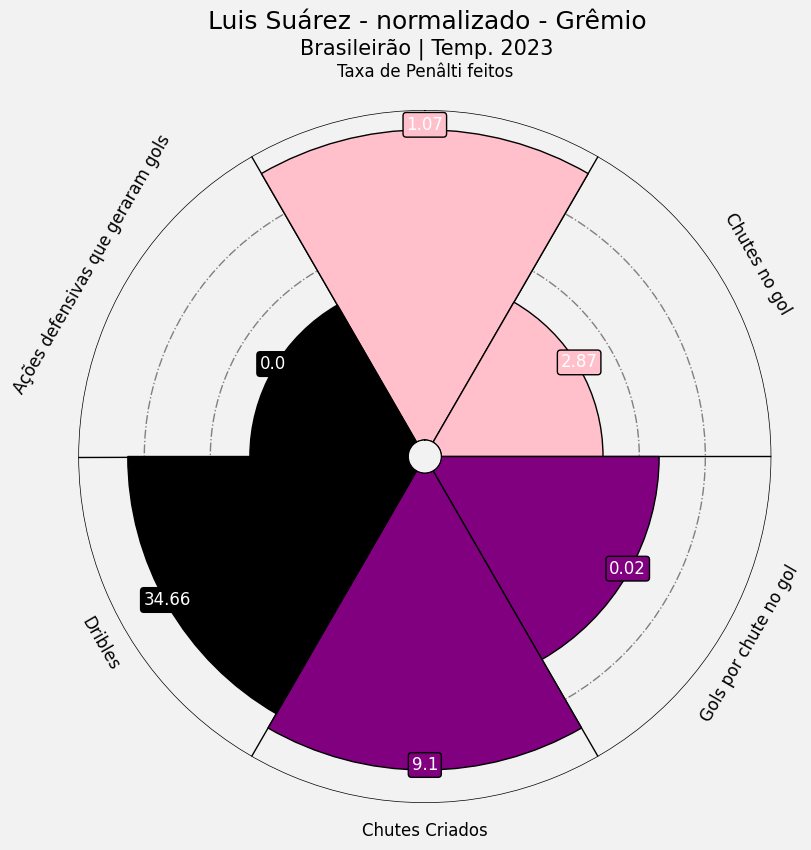

In [30]:
from mplsoccer import PyPizza, FontManager

names = ["Taxa de Penâlti feitos", "Chutes no gol", "Gols por chute no gol", "Chutes Criados", "Dribles", "Ações defensivas que geraram gols"]
slice_colors = ["pink"] * 2 + ["purple"] * 2 + ["black"] * 2
text_colors = ["white"]*6

baker = PyPizza(
    params=names,
    min_range = None, 
    max_range = None,              
    straight_line_color="#000000",  
    straight_line_lw=1,             
    last_circle_lw=1,               
    other_circle_lw=1,              
    other_circle_ls="-."            
)

fig, ax = baker.make_pizza(
    percentiles_suarez,             
    figsize=(9, 9),      
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors,
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   
    kwargs_params=dict(
        color="#000000", fontsize=12,
    ),                   
    kwargs_values=dict(
        color="#000000", fontsize=12,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    
)

texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(values_suarez[i]))

fig.text(
    0.515, 0.97, "Luis Suárez - normalizado - Grêmio", size=18,
    ha="center", color="#000000"
)

fig.text(
    0.515, 0.942,
    "Brasileirão | Temp. 2023",
    size=15,
    ha="center", color="#000000"
)
plt.show()

**Os atributos selecionados foram baseados em variar os atributos mais conhecidos, um deles, a taxa de pênalti acertada, pode ser ruim para alguns jogadores, pois não são os cobradores oficiais do time, mas em comparação com dois oficiais, é um ótimo atributo. As ações defensivas que levam em gols foi escolhida devido a poder comparar com o nível pressão que o time tem, e se ele pressiona o ataque de forma a gerar algum gol. As normalizações foram com base nos minutos jogados por jogador e na posse de seu respectivo time. Nos dribles, foi multiplicado pela chance de acertar um drible.**

**Em relação aos radares criados, podemos verificar limitações e qualidade dos jogadores**

**Hulk**
* Sua taxa de acerto de pênalti é altíssima, e pela normalização, possui alto impacto para o time.
* Ao mesmo tempo que cria diversas jogadas, ele perde muitas chances de gols, com uma taxa baixa de chutes no gol.
* O jogador não tem impacto defensivamente

**Endrick**
* Não é o cobrador de pênalti do time usualmente como os outros dois, logo, não cabe a análise
* Cria menos chances de gols que os demais, mas aproveita muito mais suas chances.
* Taxa de drible bem alta.

**Luis Suárez**
* Como o Hulk, gera uma quantidade alta de chances de gol, mas não chega aproveitar o máximo delas.
* Taxa de acerto de pênalti também bem alta
* Não é caracterizado como um jogador que faz pressão, devido suas limitações físicas.

## Questão 4
- Faça o mesmo que na questão 3, mas para meio campistas.

In [31]:
players_passing = pd.read_csv("Players_Passing.csv", sep=";")
players_passing = players_passing.loc[players_passing["Rk"] != "Rk", :].reset_index(drop=True)

In [32]:
# Assistências
assistances = players_passing["Ast"].astype(int) / games_per_player

In [33]:
# Passes progressivos
carries_enter_one_third = ((players_passing["PrgP"].astype(float)) / games_per_player) / (possession_per_player/100)

In [34]:
# Taxa de sucesso de dribles
success_take_ons_rate = player_possession["Succ%"]

In [35]:
# Ações que geraram em gols
actions_generate_goals = players_goals["GCA90"] / (possession_per_player/100)

In [36]:
# Porcentagem de passes acertados de longa distância
long_distance_rate = players_passing["Cmp%.2"].astype(float) / 100

In [37]:
# Porcentagem de passes acertados mesmo
all_passes_rate = players_passing["Cmp%"].astype(float) / 100

In [38]:
middle_field_stats = pd.concat([assistances, carries_enter_one_third, success_take_ons_rate, actions_generate_goals, long_distance_rate, all_passes_rate], axis=1)
middle_field_stats.columns = ["assistances", "carries_enter_one_third", "success_take_ons_rate", "actions_generate_goals", "long_distance_rate", "all_passes_rate"]
middle_field_stats.fillna(0, inplace=True)

In [39]:
# Selecionando os jogadores
arrascaeta = middle_field_stats.loc[players_shooting.query("Player == 'Giorgian De Arrascaeta' & Squad == 'Flamengo'")["Rk"].values[0]-1, :]
veiga = middle_field_stats.loc[players_shooting.query("Player == 'Raphael Veiga' & Squad == 'Palmeiras'")["Rk"].values[0]-1, :]
zaracho = middle_field_stats.loc[players_shooting.query("Player == 'Federico Zaracho' & Squad == 'Atlético Mineiro'")["Rk"].values[0]-1, :]

values_arrascaeta = [round(arrascaeta[column], 2) for column in middle_field_stats.columns]
values_veiga = [round(veiga[column], 2) for column in middle_field_stats.columns]
values_zaracho = [round(zaracho[column], 2) for column in middle_field_stats.columns]

percentiles_arrascaeta = [int(stats.percentileofscore(middle_field_stats[col], arrascaeta[col])) for col in middle_field_stats.columns]
percentiles_veiga = [int(stats.percentileofscore(middle_field_stats[col], veiga[col])) for col in middle_field_stats.columns]
percentiles_zaracho = [int(stats.percentileofscore(middle_field_stats[col], zaracho[col])) for col in middle_field_stats.columns]

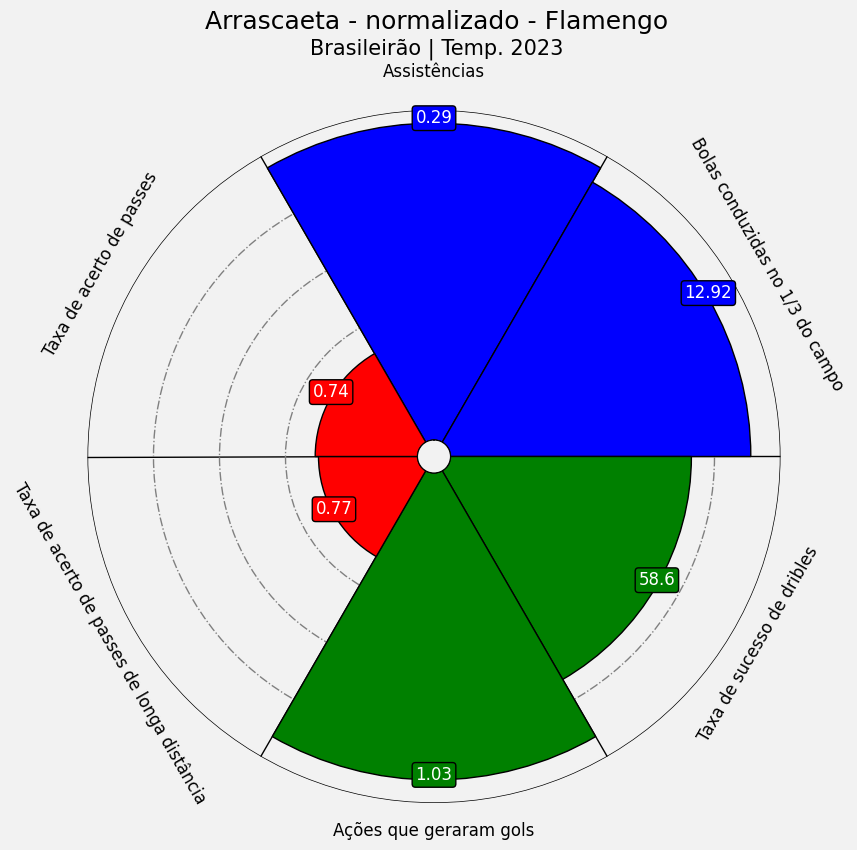

In [40]:
from mplsoccer import PyPizza, FontManager

names = ["Assistências", "Bolas conduzidas no 1/3 do campo", "Taxa de sucesso de dribles", "Ações que geraram gols", "Taxa de acerto de passes de longa distância", "Taxa de acerto de passes"]
slice_colors = ["blue"] * 2 + ["green"] * 2 + ["red"] * 2
text_colors = ["white"]*6

baker = PyPizza(
    params=names,
    min_range = None, 
    max_range = None,              
    straight_line_color="#000000",  
    straight_line_lw=1,             
    last_circle_lw=1,               
    other_circle_lw=1,              
    other_circle_ls="-."            
)

fig, ax = baker.make_pizza(
    percentiles_arrascaeta,             
    figsize=(9, 9),      
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors,
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   
    kwargs_params=dict(
        color="#000000", fontsize=12,
    ),                   
    kwargs_values=dict(
        color="#000000", fontsize=12,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    
)

texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(values_arrascaeta[i]))

fig.text(
    0.515, 0.97, "Arrascaeta - normalizado - Flamengo", size=18,
    ha="center", color="#000000"
)

fig.text(
    0.515, 0.942,
    "Brasileirão | Temp. 2023",
    size=15,
    ha="center", color="#000000"
)
plt.show()

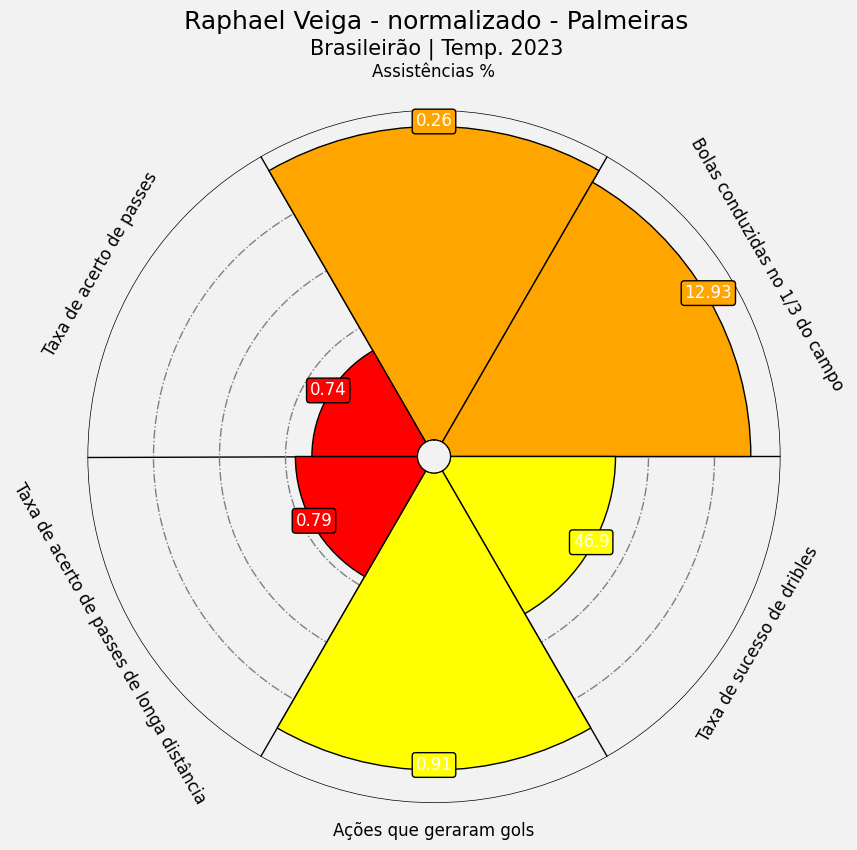

In [41]:
from mplsoccer import PyPizza, FontManager

names = ["Assistências %", "Bolas conduzidas no 1/3 do campo", "Taxa de sucesso de dribles", "Ações que geraram gols", "Taxa de acerto de passes de longa distância", "Taxa de acerto de passes"]
slice_colors = ["orange"] * 2 + ["yellow"] * 2 + ["red"] * 2
text_colors = ["white"]*6

baker = PyPizza(
    params=names,
    min_range = None, 
    max_range = None,              
    straight_line_color="#000000",  
    straight_line_lw=1,             
    last_circle_lw=1,               
    other_circle_lw=1,              
    other_circle_ls="-."            
)

fig, ax = baker.make_pizza(
    percentiles_veiga,             
    figsize=(9, 9),      
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors,
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   
    kwargs_params=dict(
        color="#000000", fontsize=12,
    ),                   
    kwargs_values=dict(
        color="#000000", fontsize=12,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    
)

texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(values_veiga[i]))

fig.text(
    0.515, 0.97, "Raphael Veiga - normalizado - Palmeiras", size=18,
    ha="center", color="#000000"
)

fig.text(
    0.515, 0.942,
    "Brasileirão | Temp. 2023",
    size=15,
    ha="center", color="#000000"
)
plt.show()

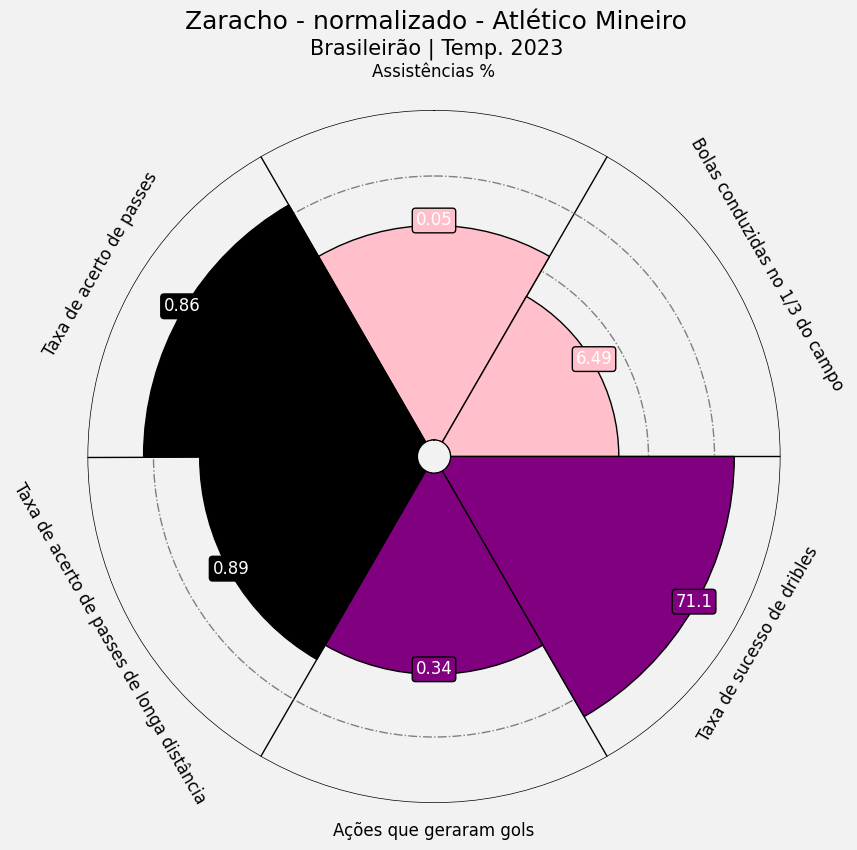

In [42]:
from mplsoccer import PyPizza, FontManager

names = ["Assistências %", "Bolas conduzidas no 1/3 do campo", "Taxa de sucesso de dribles", "Ações que geraram gols", "Taxa de acerto de passes de longa distância", "Taxa de acerto de passes"]
slice_colors = ["pink"] * 2 + ["purple"] * 2 + ["black"] * 2
text_colors = ["white"]*6

baker = PyPizza(
    params=names,
    min_range = None, 
    max_range = None,              
    straight_line_color="#000000",  
    straight_line_lw=1,             
    last_circle_lw=1,               
    other_circle_lw=1,              
    other_circle_ls="-."            
)

fig, ax = baker.make_pizza(
    percentiles_zaracho,             
    figsize=(9, 9),      
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors,
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   
    kwargs_params=dict(
        color="#000000", fontsize=12,
    ),                   
    kwargs_values=dict(
        color="#000000", fontsize=12,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    
)

texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(values_zaracho[i]))

fig.text(
    0.515, 0.97, "Zaracho - normalizado - Atlético Mineiro", size=18,
    ha="center", color="#000000"
)

fig.text(
    0.515, 0.942,
    "Brasileirão | Temp. 2023",
    size=15,
    ha="center", color="#000000"
)
plt.show()

**Para geração dos gráficos de meio de campo, foi definido os critérios apresentados, escolhidos devido a comparação entre diferentes posições do meio de campo, envolvendo progressão de passes, a taxa de acertos geral e de bolas longas, taxa dos dribles e de ações que geram mais gols, junto com a sumarização de assistências.**

**A normalização foi um pouco diferente da parte de ataque. Aqui foi utilizado muitas taxas de acertos, nas quais uma possível normalização atrapalharia mais ainda na análise do que ajudaria. Com isso, nos atributos contáveis, foi dividido pelo tempo de jogo do jogador e pela posse do time.**

**Com os gráficos gerados, há a análise dos jogadores.**

**Arrascaeta**
* Meio campista que fez menos jogos que os demais, mas ao mesmo tempo teve um impacto muito importante no time, dado seu número de assistências.
* Um meia bem ofensivo, que conduz bastante a bola no último terço do campo e tem uma alta taxa de sucesso de dribles.
* Entretanto, como joga mais ofensivo, realiza passes mais arriscados, como cruzamentos e enfiadas de bola, diminuindo drasticamente sua taxa de acerto de tais passes.

**Raphael Veiga**
* Dados bem parecidos com o Arrascaeta, com um alto impacto em assistências e ações que geram gols.
* Possui uma taxa de acerto de dribles menor que o Arrascaeta.
* Também a taxa de acerto de passes é baixa comparada aos outros jogadores.

**Zaracho**
* Como um meio campista mais recuado, suas estatísticas são diferentes dos meio campistas ofensivos comparados.
* As assistências e impacto em gols é menor que os demais.
* Todavia, sua taxa de drible é bastante alta, além da porcentagem de acertos de passes também ser. 

## Questão 5
- Faça o mesmo que na questão 3, mas para zagueiros.

In [43]:
defense = pd.read_csv("Defense.csv", sep=";")
defense = defense.loc[defense["Rk"] != "Rk", :].reset_index(drop=True)

In [44]:
# Taxa de acertos de botes em dribles
rate_tackles = defense["Tkl%"].astype(float)

In [45]:
# Bloqueio de bola rolando
blocking_the_ball = (defense["Blocks"].astype(float) / games_per_player) / ((100 - possession_per_player)/100)

In [46]:
# Limpadas de bola
clearances = (defense["Clr"].astype(float) / games_per_player) / ((100 - possession_per_player)/100)

In [47]:
# Interceptações feitas
interceptions = (defense["Int"].astype(float) / games_per_player) / ((100 - possession_per_player)/100)

In [48]:
# Taxa de botes feitos no meio de campo
middle_tackles = defense["Mid 3rd"].astype(float) / defense["Tkl"].astype(float)

In [49]:
# Taxa de botes feitos no ataque
attack_tackles = defense["Att 3rd"].astype(float) / defense["Tkl"].astype(float)

In [50]:
defender_stats = pd.concat([rate_tackles, blocking_the_ball, clearances, interceptions, middle_tackles, attack_tackles], axis=1)
defender_stats.columns = ["rate_tackles", "blocking_the_ball", "clearances", "interceptions", "middle_tackles", "attack_tackles"]
defender_stats.fillna(0, inplace=True)

In [51]:
# Selecionando os jogadores
jemerson = defender_stats.loc[players_shooting.query("Player == 'Jemerson' & Squad == 'Atlético Mineiro'")["Rk"].values[0]-1, :]
fabricio_bruno = defender_stats.loc[players_shooting.query("Player == 'Fabrício Bruno' & Squad == 'Flamengo'")["Rk"].values[0]-1, :]
gomez = defender_stats.loc[players_shooting.query("Player == 'Gustavo Gómez' & Squad == 'Palmeiras'")["Rk"].values[0]-1, :]

values_jemerson = [round(jemerson[column], 2) for column in defender_stats.columns]
values_fabricio_bruno = [round(fabricio_bruno[column], 2) for column in defender_stats.columns]
values_gomez = [round(gomez[column], 2) for column in defender_stats.columns]

percentiles_jemerson = [int(stats.percentileofscore(defender_stats[col], jemerson[col])) for col in defender_stats.columns]
percentiles_fabricio_bruno = [int(stats.percentileofscore(defender_stats[col], fabricio_bruno[col])) for col in defender_stats.columns]
percentiles_gomez = [int(stats.percentileofscore(defender_stats[col], gomez[col])) for col in defender_stats.columns]

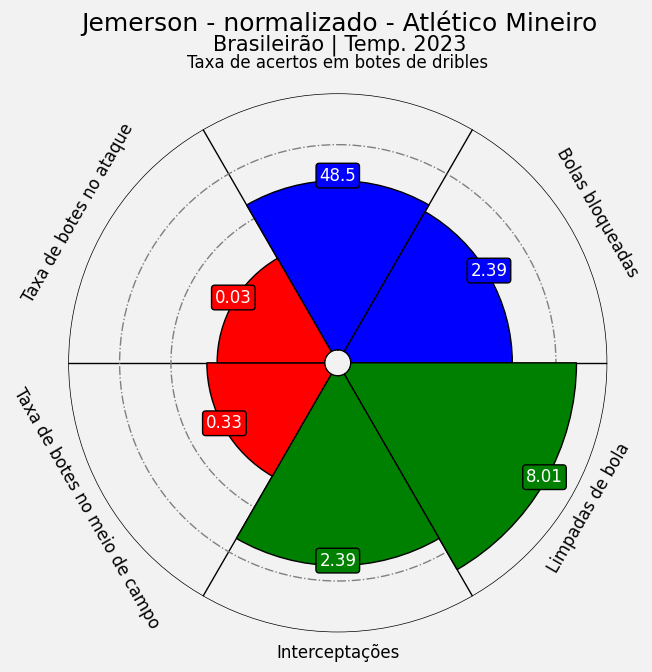

In [52]:
from mplsoccer import PyPizza, FontManager

names = ["Taxa de acertos em botes de dribles", "Bolas bloqueadas", "Limpadas de bola", "Interceptações", "Taxa de botes no meio de campo", "Taxa de botes no ataque"]
slice_colors = ["blue"] * 2 + ["green"] * 2 + ["red"] * 2
text_colors = ["white"]*6

baker = PyPizza(
    params=names,
    min_range = None, 
    max_range = None,              
    straight_line_color="#000000",  
    straight_line_lw=1,             
    last_circle_lw=1,               
    other_circle_lw=1,              
    other_circle_ls="-."            
)

fig, ax = baker.make_pizza(
    percentiles_jemerson,             
    figsize=(7, 7),      
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors,
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   
    kwargs_params=dict(
        color="#000000", fontsize=12,
    ),                   
    kwargs_values=dict(
        color="#000000", fontsize=12,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    
)

texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(values_jemerson[i]))

fig.text(
    0.515, 0.97, "Jemerson - normalizado - Atlético Mineiro", size=18,
    ha="center", color="#000000"
)

fig.text(
    0.515, 0.942,
    "Brasileirão | Temp. 2023",
    size=15,
    ha="center", color="#000000"
)
plt.show()

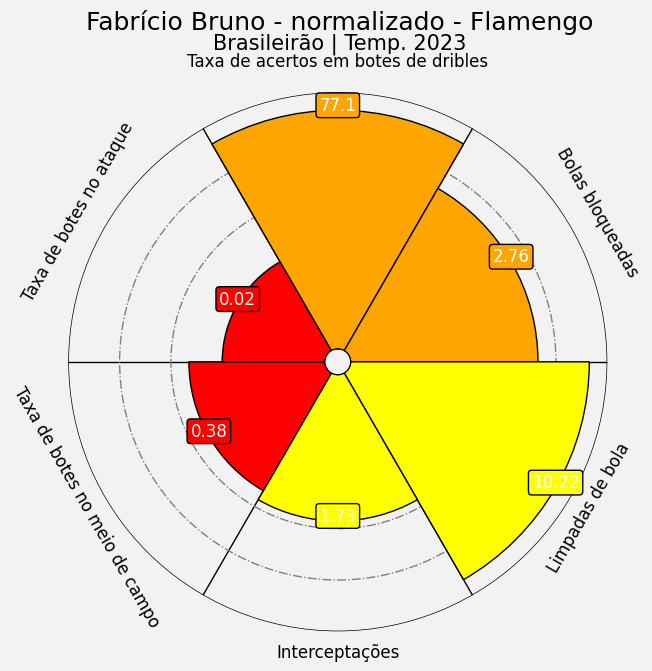

In [53]:
from mplsoccer import PyPizza, FontManager

names = ["Taxa de acertos em botes de dribles", "Bolas bloqueadas", "Limpadas de bola", "Interceptações", "Taxa de botes no meio de campo", "Taxa de botes no ataque"]
slice_colors = ["orange"] * 2 + ["yellow"] * 2 + ["red"] * 2
text_colors = ["white"]*6

baker = PyPizza(
    params=names,
    min_range = None, 
    max_range = None,              
    straight_line_color="#000000",  
    straight_line_lw=1,             
    last_circle_lw=1,               
    other_circle_lw=1,              
    other_circle_ls="-."            
)

fig, ax = baker.make_pizza(
    percentiles_fabricio_bruno,             
    figsize=(7, 7),      
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors,
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   
    kwargs_params=dict(
        color="#000000", fontsize=12,
    ),                   
    kwargs_values=dict(
        color="#000000", fontsize=12,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    
)

texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(values_fabricio_bruno[i]))

fig.text(
    0.515, 0.97, "Fabrício Bruno - normalizado - Flamengo", size=18,
    ha="center", color="#000000"
)

fig.text(
    0.515, 0.942,
    "Brasileirão | Temp. 2023",
    size=15,
    ha="center", color="#000000"
)
plt.show()

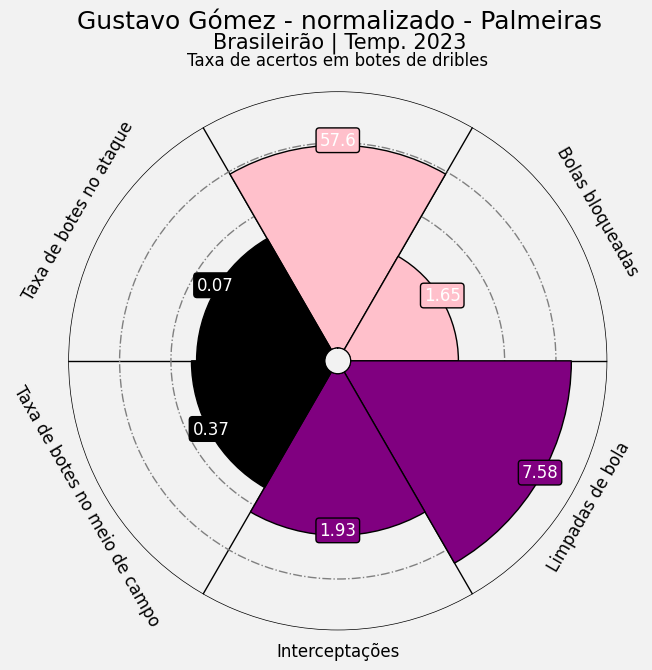

In [54]:
from mplsoccer import PyPizza, FontManager

names = ["Taxa de acertos em botes de dribles", "Bolas bloqueadas", "Limpadas de bola", "Interceptações", "Taxa de botes no meio de campo", "Taxa de botes no ataque"]
slice_colors = ["pink"] * 2 + ["purple"] * 2 + ["black"] * 2
text_colors = ["white"]*6

baker = PyPizza(
    params=names,
    min_range = None, 
    max_range = None,              
    straight_line_color="#000000",  
    straight_line_lw=1,             
    last_circle_lw=1,               
    other_circle_lw=1,              
    other_circle_ls="-."            
)

fig, ax = baker.make_pizza(
    percentiles_gomez,             
    figsize=(7, 7),      
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors,
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   
    kwargs_params=dict(
        color="#000000", fontsize=12,
    ),                   
    kwargs_values=dict(
        color="#000000", fontsize=12,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    
)

texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(values_gomez[i]))

fig.text(
    0.515, 0.97, "Gustavo Gómez - normalizado - Palmeiras", size=18,
    ha="center", color="#000000"
)

fig.text(
    0.515, 0.942,
    "Brasileirão | Temp. 2023",
    size=15,
    ha="center", color="#000000"
)
plt.show()

**Para a defesa, a normalização sobre posse de bola é inversa, ou seja, 100 - % da posse do time. Isso pois queremos avaliar as oportunidades de defesa dos zagueiros. Além disso, para os atributos sem taxa, é normalizado pelo tempo de jogo também. Os atributos selecionados focam em avaliar os seguintes critérios:**
* Se o zagueiro é avançando ou não, dado as taxas de botes no meio/ataque de campo.
* Taxa de sucesso em botes.
* Preferência em sair jogando ou limpadas de bolas.
* Impacto das interceptações.

**Logo, conseguimos analisar pelos jogadores as informações, com as seguintes percepções:**

**Jemerson**
* Altas taxas de interceptações e limpadas de bolas.
* Preferência dos botes na defesa, mas com quase 40% de botes no meio de campo, caracterizando um jogo avançado.
* Não tem o costume de bloquear chutes ou passes.

**Fabrício Bruno**
* Poucas interceptações, mas com altos bloqueios de chutes e passes.
* A taxa de sucesso em botes de dribles é de se destacar, a maior dos três, que são zagueiros de times de elite.
* Caracterizado por limpadas de bola e uma presença no meio de campo

**Gustavo Gómez**
* Números bem parecidos com o do Jemerson.
* Bloqueios de chutes e passes bem baixo comparado aos dois.

## Questão 6
- Discuta as diferenças entre os radares das questões 3, 4 e 5. Quais são as principais diferenças entre os atributos relevantes para cada posição? Quais são as principais semelhanças? A impressão subjetiva que você tinha dos jogadores se comprovou pelos radares? Se não, por quê? Quais posições são mais difíceis de serem avaliadas por estatísticas?

Quando tratamos de **ataque**, os atributos são muito mais claros, pois o objetivo-alvo é simples: **fazer gol**. Logo, todos os atributos são envolta disso, mesmo indiretamente, tornando fácil e bem comparável a seleção, pois atacante que é bom é o que impacta em gols, dado as diversidades do seu time. Nesse campo, as impressões subjetivas foram comprovadas, onde os três jogadores são de altíssimo impacto do time. Algo que me surpreendeu foi o número de chances que Hulk e Suárez precisam para fazer o gol, sendo bem mais altas que as do Endrick.

Sobre **meio de campo**, as estatísticas são mais subjetivas, pois nosso foco pode ser vários, e depende extremamente do objetivo do time. Como exemplo, times de alta posse ou de mais defesa terão números bem diferentes. Com isso, foi utilizado atributos de **taxa**, nos quais depende mais da qualidade do jogador do que do time. Isso também relaciona com outra dificuldade, a de normalização dos dados. As impressões foram confirmadas, principalmente em relação a comparação entre meias mais ofensivos com um mais defensivo, como as taxas de acertos de drible são menores no ataque do que na defesa. O que surpreendeu foi a taxa de acerto de passes de meias de extrema qualidade, como Arrascaeta e Veiga.

Na área de **defesa**, foi **a posição mais difícil de analisar**. Os atributos são variados e muitos não indicam uma possível qualidade do zagueiro. O foco foi entender a atuação dos jogadores em determinados setores, como área de atuação ou a forma de defesa (botes ou bloqueios posicionais). O impacto que isso ocasionou é de difícil mensuração. A impressão não foi comprovada, imaginava que os defensores tivessem pouca atuação no meio de campo, mas tendem a ter quase 40% de seus botes nessa área. 

Assim, o foco em cada área foi tentar selecionar atributos focados em determinados objetivos-alvo, nos quais tendem a ser o mais disjuntos possíveis para não atrapalhar as análises. O notebook foi de extrema utilidade para entender essas análises, e as normalizações também serviram para tornarem os jogadores mais comparáveis.